<a href="https://colab.research.google.com/github/subbu27iitb/AutoML/blob/main/AutoViML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ViML : Visualization Interpretation Machine Learning**

In [3]:
!pip install autoviml

     |████████████████████████████████| 125 kB 5.0 MB/s 
     |████████████████████████████████| 564 kB 25.9 MB/s 
     |████████████████████████████████| 170 kB 45.6 MB/s 
     |████████████████████████████████| 125 kB 60.4 MB/s 
     |████████████████████████████████| 76.3 MB 1.2 MB/s 
     |████████████████████████████████| 173.5 MB 11 kB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=41b1ec99bc7982b6a8160f4535b9bca82458077888eb1b17aee6ece622ed918b
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [4]:
!pip install shap #To get Model Interpretation like feature contribution

In [29]:
!pip install 'neptune-contrib[monitoring]>=0.24.9'

In [5]:
from __future__ import print_function
import sys, tempfile, urllib, os
import pandas as pd
import xgboost as xgb

**Import Dataset**

In [6]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [7]:
churn_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Split train and test datasets**

In [8]:
size = int(0.7*churn_df.shape[0])
train_df = churn_df[:size]
test_df = churn_df[size:]
#test_df.shape

**Import AutoViML**

In [9]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.684. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [10]:
target = 'Churn'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (4930, 21)
    Training Set Memory Usage = 0.79 MB
Test Set Shape = (2113, 21)
    Test Set Memory Usage = 0.34 MB
Single_Label Target: ['Churn']
Random shuffling the data set before training
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
       Class  -> Counts -> Percent
          No:    3641  ->   73.9%
         Yes:    1289  ->   26.1%
String or Multi Class target: Churn transformed as follows: {'No': 0, 'Yes': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    20 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
        ['customerID']
Number of Processors on this device = 1
CPU available
    GPU active on this device
#############     D A T A    P R E P A R A T I O N   A

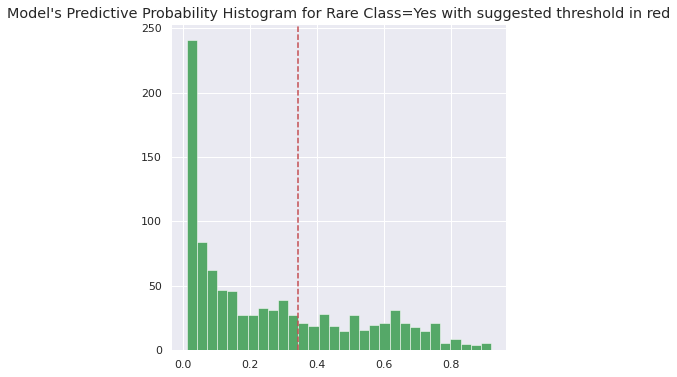

    Using threshold=0.5. However, 0.342 provides better F1=0.65 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 79.3%
Balanced Accuracy = 72.89% with Threshold = 0.50
Confusion Matrix:
[[655  73]
 [114 144]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       728
           1       0.66      0.56      0.61       258

    accuracy                           0.81       986
   macro avg       0.76      0.73      0.74       986
weighted avg       0.80      0.81      0.80       986

Balanced Accuracy = 77.55% with Threshold = 0.34
Confusion Matrix:
[[593 135]
 [ 68 190]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       728
           1       0.58      0.74      0.65       258

    accuracy                           0.79       986
   macro avg       0.74      0.78      0.75

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 79.8%
    Balanced Accuracy = 77.2%
    Precision         = 59.5%
    Average Precision = 74.3%
    Recall            = 71.7%
    F1 Score          = 65.0%
#####################################################
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       728
           1       0.59      0.72      0.65       258

    accuracy                           0.80       986
   macro avg       0.74      0.77      0.75       986
weighted avg       0.81      0.80      0.80       986

[[602 126]
 [ 73 185]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


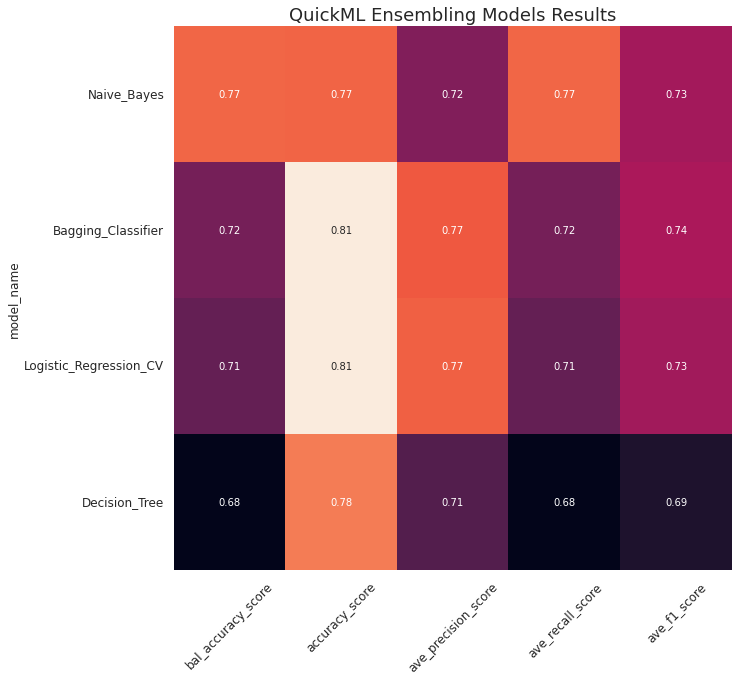

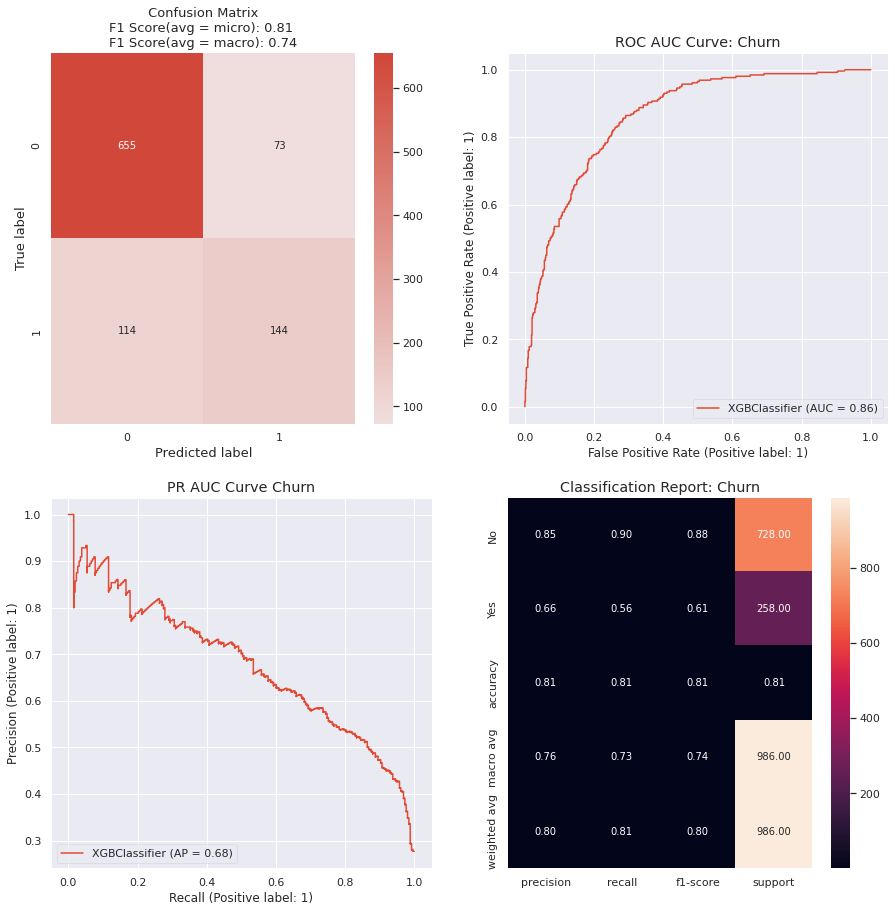

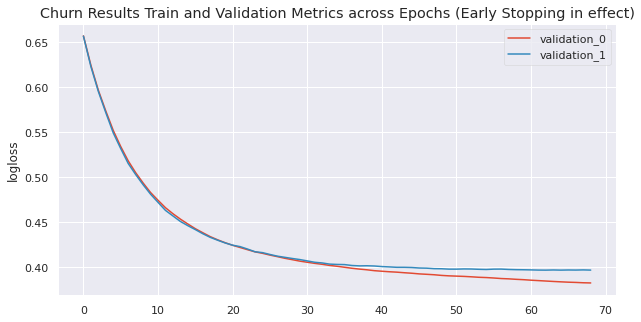

    Time taken for this Target (in seconds) = 2449
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 1
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.342
    Calculating weighted average ensemble of 5 classifiers
########################################################
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
Trying to plot SHAP values if SHAP is installed in this machine...


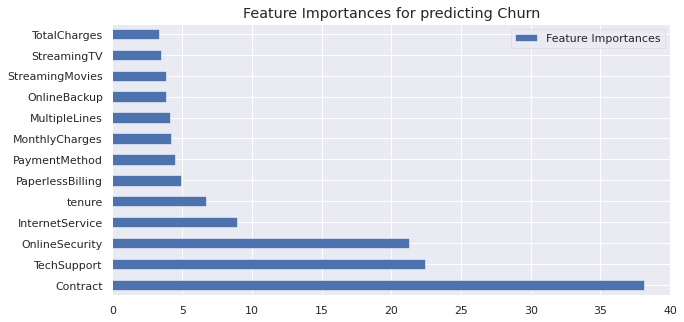

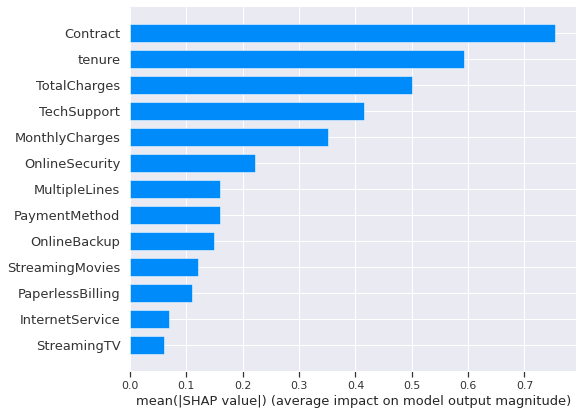

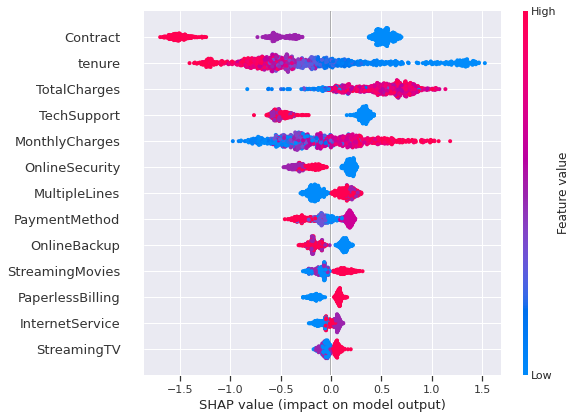

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 2455
Writing Output files to disk...
    Saving predictions to ./Churn/Churn_Binary_Classification_test_modified.csv
    Saving predictions to ./Churn/Churn_Binary_Classification_submission.csv
    Saving predictions to ./Churn/Churn_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 40.9 for the Entire Process


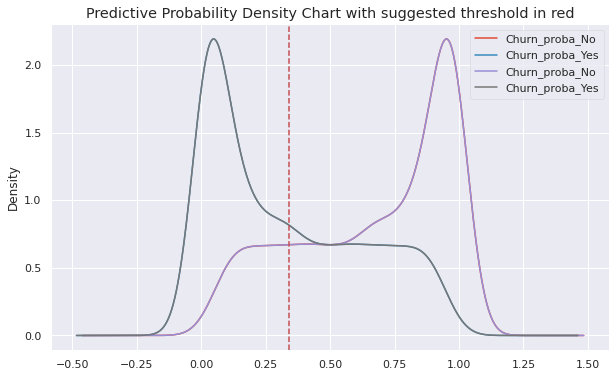

In [11]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                           scoring_parameter='',
                                           hyper_param = 'GS', feature_reduction =True,
                                           Boosting_Flag = True, Binning_Flag = False,
                                           Add_Poly=0, Stacking_Flag = False,
                                           Imbalanced_Flag = True, verbose=3)

In [12]:
features
trainm.head()
testm.head()

,customerID,Contract,TechSupport,OnlineSecurity,InternetService,tenure,OnlineBackup,PaperlessBilling,MonthlyCharges,PaymentMethod,TotalCharges,StreamingMovies,MultipleLines,StreamingTV,Churn_proba_No,Churn_proba_Yes,Churn_predictions,Churn_Logistic_Regression_CV_predictions,Churn_Decision_Tree_predictions,Churn_Naive_Bayes_predictions,Churn_Bagging_Classifier_predictions,Churn_XGBoost_predictions,Churn_Ensembled_predictions
4930,8180-AKMJV,0.00,0.00,0.00,0.00,0.01,0.00,1.00,0.26,0.33,0.57,0.00,0.00,0.00,0.63,0.37,Yes,Yes,Yes,Yes,No,Yes,Yes
4931,4298-OYIFC,0.00,1.00,0.00,0.50,0.21,0.00,1.00,0.85,0.67,1.06,1.00,1.00,1.00,0.14,0.86,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4932,5566-SOEZD,0.50,0.00,1.00,0.50,0.38,1.00,1.00,0.62,0.33,1.11,0.00,0.00,0.00,0.89,0.11,No,No,No,No,No,No,No
4933,9842-EFSYY,0.00,0.00,1.00,0.00,0.06,1.00,1.00,0.39,1.00,1.11,1.00,0.50,1.00,0.59,0.41,Yes,No,No,Yes,No,Yes,Yes
4934,2272-WUSPA,1.00,0.00,1.00,0.50,1.00,1.00,1.00,0.92,0.67,1.37,1.00,1.00,1.00,0.92,0.08,No,No,No,No,No,No,No


**CONFUSION MATRIX-VARIOUS ALGOS**

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print("LR Confusion matrix")
print(confusion_matrix(test_df[target].values, testm['Churn_Logistic_Regression_CV_predictions'].values))
print("Decision Trees Confusion matrix")
print(confusion_matrix(test_df[target].values, testm['Churn_Decision_Tree_predictions'].values))
print("Naive Bayes Confusion matrix")
print(confusion_matrix(test_df[target].values, testm['Churn_Naive_Bayes_predictions'].values))
print("XGBoost Confusion matrix")
print(confusion_matrix(test_df[target].values, testm['Churn_XGBoost_predictions'].values))

LR Confusion matrix
[[1356  177]
 [ 257  323]]
Decision Trees Confusion matrix
[[1324  209]
 [ 289  291]]
Naive Bayes Confusion matrix
[[1158  375]
 [ 160  420]]
XGBoost Confusion matrix
[[1110  423]
 [ 140  440]]


CLASSIFICATION REPORT - VARIOUS ALGOS

In [14]:
print("Naive Bayes Classification Report")
print(classification_report(test_df[target].values, testm['Churn_Naive_Bayes_predictions'].values))
print("XGBoost Classification Report")
print(classification_report(test_df[target].values, testm['Churn_XGBoost_predictions'].values))

Naive Bayes Classification Report
              precision    recall  f1-score   support

          No       0.88      0.76      0.81      1533
         Yes       0.53      0.72      0.61       580

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.78      0.75      0.76      2113

XGBoost Classification Report
              precision    recall  f1-score   support

          No       0.89      0.72      0.80      1533
         Yes       0.51      0.76      0.61       580

    accuracy                           0.73      2113
   macro avg       0.70      0.74      0.70      2113
weighted avg       0.78      0.73      0.75      2113

